# US Accidents Exploratory Data Analysis

The dataset is extracted from Kaggle. It provides information about accidents so that inferences can be helpful to prevent accidents.

## Loading the dataset

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('US_Accidents_March23.csv')
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


## Data preparation and cleaning

In [5]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [8]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [11]:
numerical = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_data = data.select_dtypes(include=numerical)
len(numerical_data.columns)

13

In [13]:
#Count of missing values
data.isna().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [18]:
#Removing columns we won't use
data2 = data.drop(['End_Lat', 'End_Lng'], axis=1)
data2

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,Pomona Fwy E,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,...,False,False,False,False,False,False,Day,Day,Day,Day


In [42]:
data_refined = data2.dropna(how='any', subset=['Precipitation(in)', 'Wind_Chill(F)', 'Wind_Speed(mph)', 'Visibility(mi)', 'Wind_Direction', 'Humidity(%)', 'Weather_Condition', 'Temperature(F)', 'Pressure(in)', 'Sunrise_Sunset', 'Street', 'City'])
data_refined

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.010,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,0.010,Right hand shoulder blocked due to accident on...,Westerville Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
11,A-12,Source2,3,2016-02-08 08:21:27,2016-02-08 08:51:27,39.932709,-82.830910,0.010,One lane blocked due to accident on I-70 Westb...,I-70 E,...,False,False,False,False,False,False,Day,Day,Day,Day
14,A-15,Source2,2,2016-02-08 08:39:43,2016-02-08 09:09:43,39.972038,-82.913521,0.010,Accident on OH-16 Broad St at James Rd. Expect...,E Broad St,...,False,False,False,False,True,False,Day,Day,Day,Day
20,A-21,Source2,2,2016-02-08 10:11:15,2016-02-08 10:41:15,40.052509,-82.882332,0.000,Accident on Brookhill Dr at Glenhurst Ct.,Brookhill Dr,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,Pomona Fwy E,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,...,False,False,False,False,False,False,Day,Day,Day,Day


## Explanatory Analysis and Visualisation

### City Analysis

In [39]:
cities = data.groupby('City')
cities

In [71]:
len(cities)

13678

In [51]:
cities_by_accident = cities['ID'].count().sort_values(ascending=False)
cities_by_accident

City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
                ...  
Gracemont           1
Section             1
Selby               1
Brussels            1
Elk Rapids          1
Name: ID, Length: 13678, dtype: int64

<Axes: xlabel='City'>

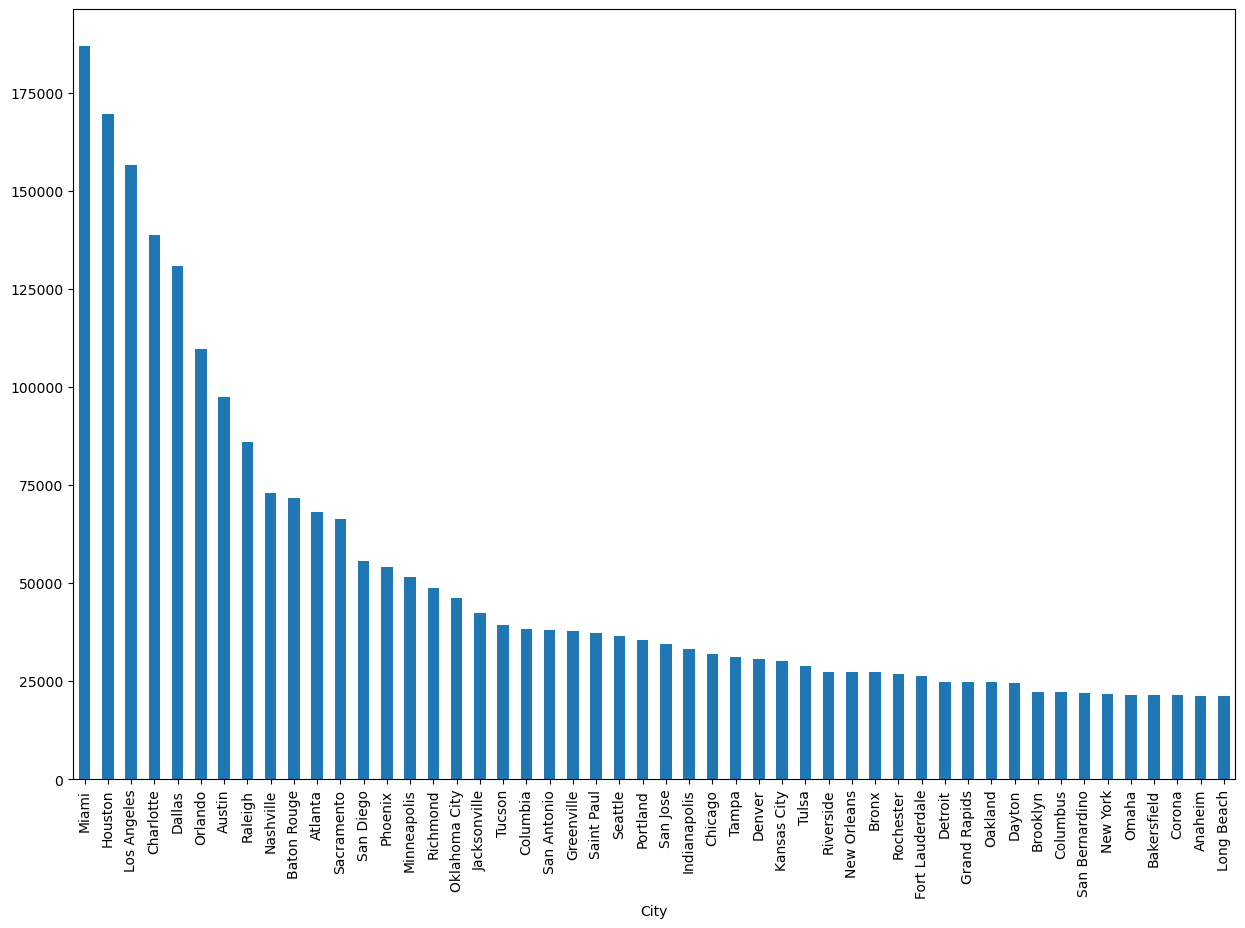

In [59]:
plt.figure(figsize=(15,10))
cities_by_accident[:50].plot(kind='bar')

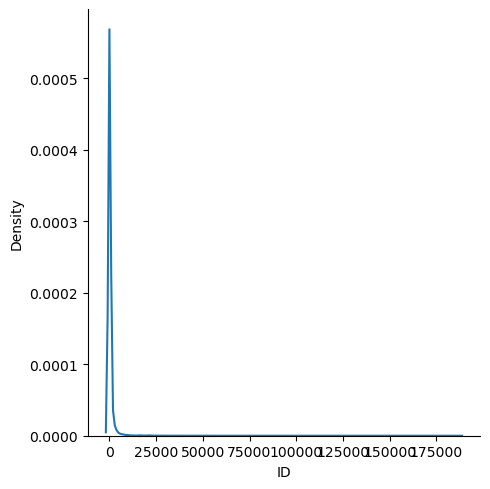

In [62]:
sns.displot(cities_by_accident, kind='kde')

In [66]:
high_accident_cities = cities_by_accident[cities_by_accident>=10000]
medium_accident_cities = cities_by_accident[(cities_by_accident<10000) & (cities_by_accident>=1000)]
low_accident_cities = cities_by_accident[cities_by_accident<1000]

In [73]:
len(high_accident_cities)

105

In [68]:
len(medium_accident_cities)

1113

In [69]:
len(low_accident_cities)

12460

In [75]:
#Percentage of high, medium and low accident cities respectively
print(len(high_accident_cities)/len(cities))
print(len(medium_accident_cities)/len(cities))
print(len(low_accident_cities)/len(cities))

0.007676560900716479
0.08137154554759468
0.9109518935516888


In [77]:
cities_by_accident[cities_by_accident<5]

City
Belspring        4
Mccammon         4
Bogata           4
Fishing Creek    4
Mellen           4
                ..
Gracemont        1
Section          1
Selby            1
Brussels         1
Elk Rapids       1
Name: ID, Length: 2744, dtype: int64

Insights:-
* About 0.77% of cities have more than 10,000 accidents.
* About 8.1% of cities have accidents between 1000 to 10,000.
* 91% of the cities have less than 1000 accidents
* 2744 cities have reported accidents less than 5. (Needs to be investigated)

Miami is the city having maximum number of accidents.

### Severity Analysis

In [78]:
severity = data.groupby('Severity')

In [79]:
len(severity)

4

In [81]:
severity_by_accident = severity['ID'].count()
severity_by_accident

Severity
1      67366
2    6156981
3    1299337
4     204710
Name: ID, dtype: int64

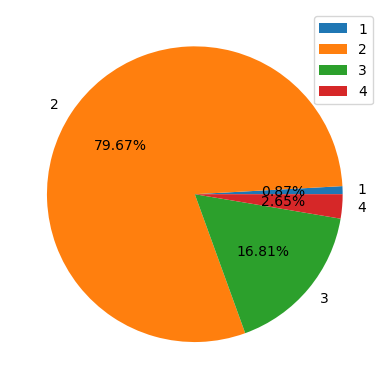

In [90]:
plt.pie(severity_by_accident, autopct='%0.2f%%', labels=severity_by_accident.index)
plt.legend()
plt.show()

### Temperature Analysis

In [119]:
temp = data_refined.groupby('Temperature(F)')

In [120]:
len(temp)

378

In [121]:
temp_accident = temp['ID'].count().sort_values(ascending=False)
temp_accident

Temperature(F)
 73.0    126867
 72.0    118590
 75.0    116982
 77.0    116593
 70.0    114254
          ...  
 6.4          1
 6.3          1
 5.9          1
 5.4          1
-45.0         1
Name: ID, Length: 378, dtype: int64

<Axes: xlabel='Temperature(F)', ylabel='Count'>

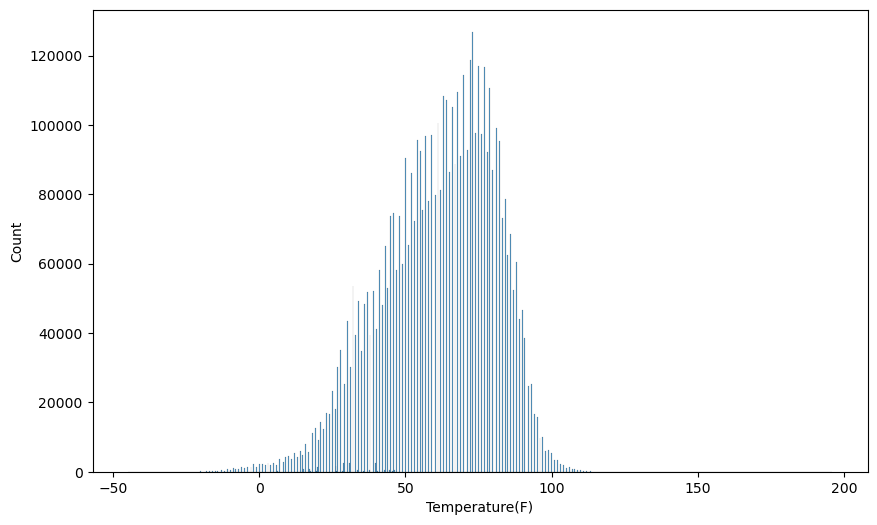

In [118]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data_refined['Temperature(F)'])

### Humidity Analysis

In [116]:
humidity = data_refined.groupby('Humidity(%)')

In [117]:
humid_accident = humidity['ID'].count().sort_values(ascending=False)
humid_accident

Humidity(%)
93.0     204802
100.0    178477
90.0     117458
87.0     117127
89.0     106320
          ...  
5.0        2918
4.0        1424
3.0         624
2.0         178
1.0          45
Name: ID, Length: 100, dtype: int64

<Axes: xlabel='Humidity(%)', ylabel='Count'>

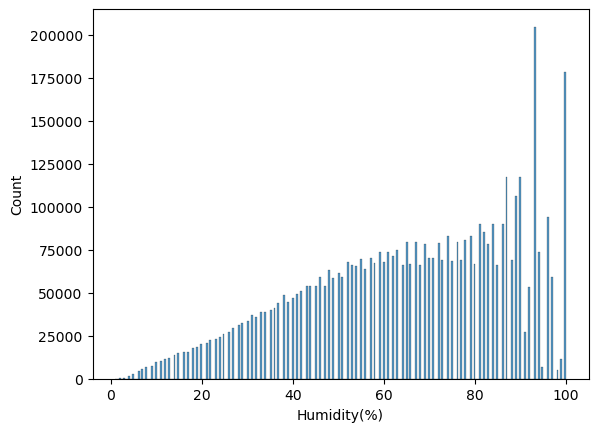

In [115]:
sns.histplot(data_refined['Humidity(%)'])

Insights: - 
We can infer from the graph that, as the humidity increases, accidents increases.

### Precipitation Analysis 

<Axes: xlabel='Precipitation(in)', ylabel='Count'>

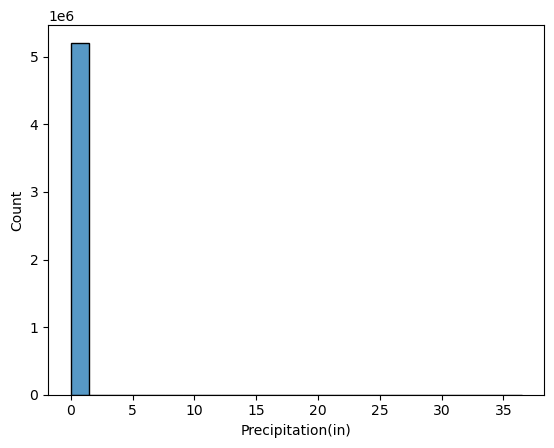

In [122]:
sns.histplot(data_refined['Precipitation(in)'])

In [123]:
ppt = data_refined.groupby('Precipitation(in)')

In [124]:
ppt_accident = ppt['ID'].count().sort_values(ascending=False)
ppt_accident

Precipitation(in)
0.00     4795473
0.01      119028
0.02       57740
0.03       38971
0.04       29127
          ...   
2.74           1
2.75           1
2.81           1
2.85           1
36.47          1
Name: ID, Length: 258, dtype: int64

Insights: - 
Rain doesn't have much impact on accidents.

### Weather Condition Analysis

In [125]:
weather = data_refined.groupby('Weather_Condition')

In [127]:
weather_accident = weather['ID'].count().sort_values(ascending=False)
weather_accident

Weather_Condition
Fair                         2418180
Cloudy                        782961
Mostly Cloudy                 683291
Partly Cloudy                 467441
Light Rain                    259973
                              ...   
Blowing Snow Nearby                1
Heavy Rain Shower / Windy          1
Partial Fog / Windy                1
Heavy Sleet / Windy                1
Blowing Sand                       1
Name: ID, Length: 127, dtype: int64

In [130]:
weather_required = weather_accident[weather_accident >= 1000]
weather_required

Weather_Condition
Fair                       2418180
Cloudy                      782961
Mostly Cloudy               683291
Partly Cloudy               467441
Light Rain                  259973
Light Snow                  117480
Fog                          83301
Rain                         60503
Haze                         46469
Fair / Windy                 33906
Heavy Rain                   23388
Thunder in the Vicinity      16932
Cloudy / Windy               16212
Light Drizzle                16156
Mostly Cloudy / Windy        16127
T-Storm                      16096
Overcast                     15465
Snow                         13828
Thunder                      13770
Light Rain with Thunder      13263
Wintry Mix                   11506
Partly Cloudy / Windy         9950
Heavy T-Storm                 9326
Smoke                         8998
Light Rain / Windy            7742
Light Snow / Windy            6630
Heavy Snow                    4471
Drizzle                       3035
Li

<BarContainer object of 15 artists>

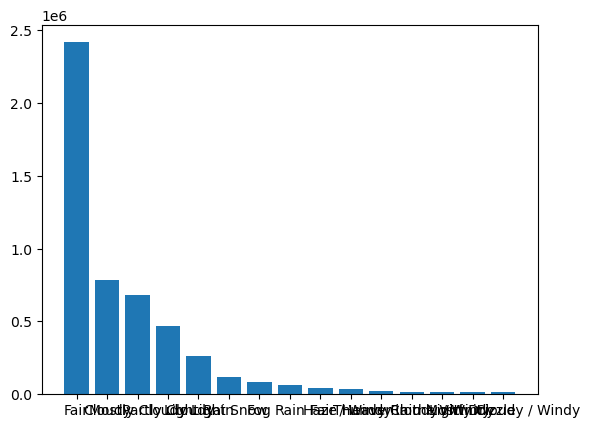

In [134]:
plt.bar(weather_required.head(15).index, weather_required.head(15).values)

### Time of the day analysis 

In [135]:
day = data_refined.groupby('Sunrise_Sunset')

In [137]:
day_accident = day['ID'].count().sort_values(ascending=False)
day_accident

Sunrise_Sunset
Day      3522853
Night    1685153
Name: ID, dtype: int64

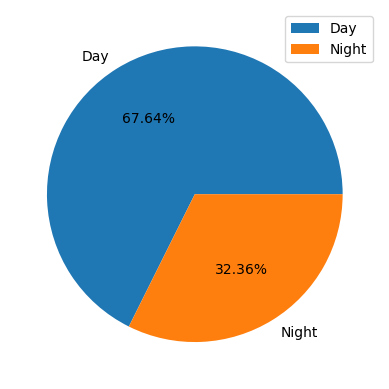

In [138]:
plt.pie(day_accident, autopct='%0.2f%%', labels=day_accident.index)
plt.legend()
plt.show()

### Start Time Analysis

In [139]:
data.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [142]:
type(data.Start_Time[0])

str

This is a string, we need to convert it into timestamp format.

In [154]:
datetime = pd.to_datetime(data.Start_Time)
datetime

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: datetime64[ns]

In [159]:
datetime[0]

Timestamp('2016-02-08 05:46:00')

In [161]:
hour_of_accident = datetime.dt.hour
hour_of_accident

0           5
1           6
2           6
3           7
4           7
           ..
7728389    18
7728390    19
7728391    19
7728392    19
7728393    18
Name: Start_Time, Length: 7728394, dtype: int64

<Axes: xlabel='Start_Time', ylabel='Count'>

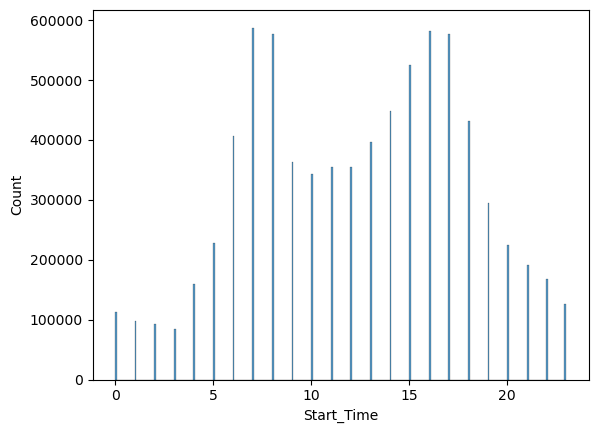

In [165]:
sns.histplot(hour_of_accident)

In [173]:
dt = hour_of_accident.groupby(hour_of_accident.values)
dt

In [176]:
hours = dt.size()
hours

0     112378
1      97071
2      93227
3      83863
4     159852
5     228182
6     405837
7     587472
8     577576
9     363034
10    342706
11    355040
12    355001
13    396445
14    448846
15    525855
16    581969
17    576015
18    432042
19    295121
20    225226
21    191452
22    167645
23    126539
Name: Start_Time, dtype: int64

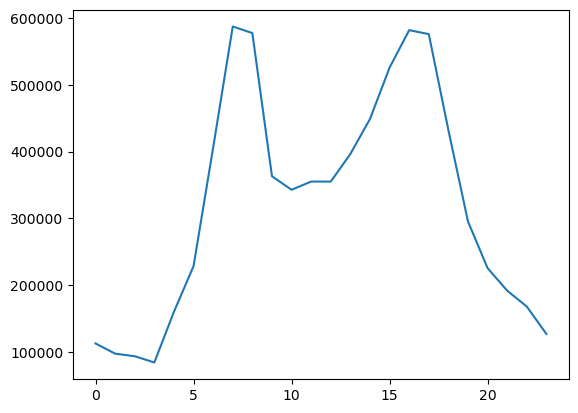

In [180]:
plt.plot(hours.index, hours.values)

Insights: - 
- A high percentage of accidents occur between 6 am to 10 am (probably because people are in a hurry during that time to get to work.)
- Also a high percentage of accidents occur between 2 pm to 6 pm.

In [185]:
day_of_accident = datetime.dt.dayofweek
day_of_accident

0          0
1          0
2          0
3          0
4          0
          ..
7728389    4
7728390    4
7728391    4
7728392    4
7728393    4
Name: Start_Time, Length: 7728394, dtype: int64

<Axes: xlabel='Start_Time', ylabel='Count'>

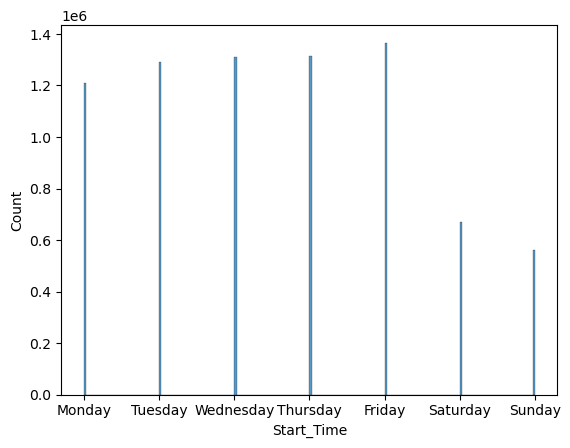

In [189]:
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.histplot(day_of_accident)

Insights: - 
On weekends, the number of accidents is less.

In [196]:
weekend_start_time = datetime[(day_of_accident == 5) | (day_of_accident == 6)]
weekend_start_time

129       2016-02-13 11:05:00
130       2016-02-13 11:05:21
131       2016-02-13 11:17:01
132       2016-02-13 11:25:42
133       2016-02-13 12:56:31
                  ...        
7726137   2019-08-18 23:24:10
7726177   2019-08-17 03:36:35
7726252   2019-08-18 22:56:56
7726253   2019-08-18 22:56:56
7726292   2019-08-18 22:54:41
Name: Start_Time, Length: 1231427, dtype: datetime64[ns]

<Axes: xlabel='Start_Time', ylabel='Count'>

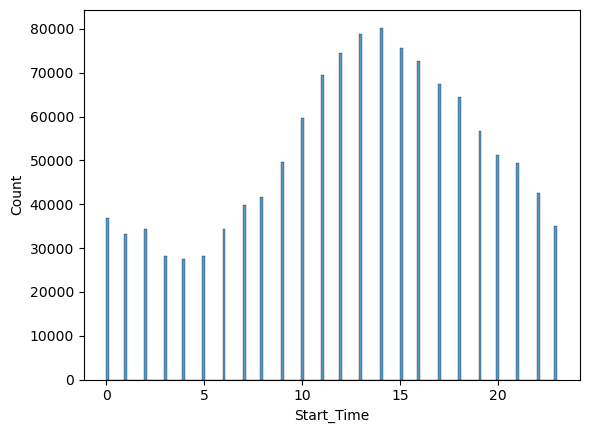

In [197]:
sns.histplot(weekend_start_time.dt.hour)

In [199]:
weekdays_start_time = datetime[day_of_accident.isin([0, 1, 2, 3, 4])]
weekdays_start_time

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 6496967, dtype: datetime64[ns]

<Axes: xlabel='Start_Time', ylabel='Count'>

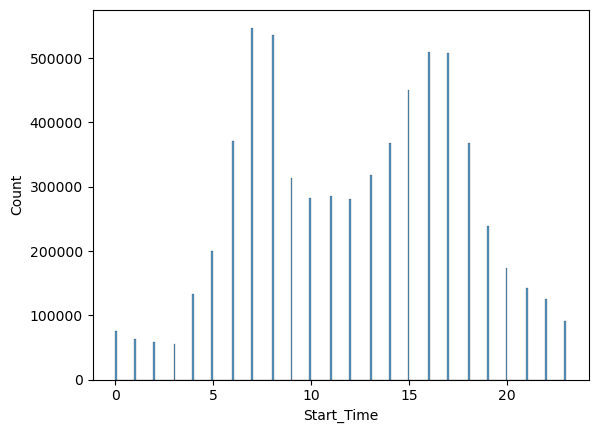

In [200]:
sns.histplot(weekdays_start_time.dt.hour)

Insights: - 
- During weekends, most accidents occur during afternoon
- During weekdays, most accidents occur during morning or evening.